In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3934,2020-04-06,1138.000000,1194.660034,1130.939941,1186.920044,1186.920044,2664700
3935,2020-04-07,1221.000000,1225.000000,1182.229980,1186.510010,1186.510010,2387300
3936,2020-04-08,1206.500000,1219.069946,1188.160034,1210.280029,1210.280029,1975100
3937,2020-04-09,1224.079956,1225.569946,1196.734985,1211.449951,1211.449951,2175400
3938,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1735700


In [4]:
data_train=data[data['Date']<'2019-01-01'].copy()
data_train


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [5]:
data_training=data_train.drop(['Date','Adj Close'], axis=1)

past_60_days=data_training.tail(60)

In [6]:
data_test = data[data['Date']>='2019-01-01'].copy()

In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
scaler=StandardScaler()
data_training=scaler.fit_transform(data_training)
data_training

array([[-1.33538769, -1.33164328, -1.33843719, -1.33432737,  4.55474743],
       [-1.33367079, -1.32317637, -1.33065596, -1.32078011,  1.88322299],
       [-1.3171138 , -1.31575517, -1.31600192, -1.31892735,  1.32281017],
       ...,
       [ 1.965683  ,  2.02736995,  1.92747104,  2.05715714, -0.65483792],
       [ 2.07648792,  2.06688374,  2.05168018,  2.03395327, -0.73950899],
       [ 2.0810606 ,  2.05719966,  2.01895931,  2.02893728, -0.72994542]])

In [9]:
X_train = []
y_train = []

In [10]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(3557, 60, 5)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
X_train.shape[1]

60

In [14]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [15]:
regressior.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [19]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [20]:
regressior.fit(X_train, y_train, epochs=10, batch_size=32)

Train on 3557 samples
Epoch 1/10
3557/3557 [==============================] - 35s 10ms/sample - loss: 0.0222 - accuracy: 0.0000e+00
Epoch 2/10
3557/3557 [==============================] - 28s 8ms/sample - loss: 0.0175 - accuracy: 0.0000e+00
Epoch 3/10
3557/3557 [==============================] - 27s 8ms/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 4/10
3557/3557 [==============================] - 28s 8ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5/10
3557/3557 [==============================] - 30s 8ms/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 7/10
3557/3557 [==============================] - 28s 8ms/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 8/10
3557/3557 [==============================] - 28s 8ms/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 9/10
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0127 - accuracy: 0.0000e

In [21]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [22]:
past_60_days


,Open,High,Low,Close,Volume
3557,1195.329956,1197.510010,1155.576050,1168.189941,2209500
3558,1167.500000,1173.500000,1145.119995,1157.349976,1184300
3559,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3560,1146.150024,1154.349976,1137.572021,1138.819946,1308700
3561,1131.079956,1132.170044,1081.130005,1081.219971,2675700
3562,1072.939941,1106.400024,1068.270020,1079.319946,2949000
3563,1108.000000,1115.000000,1086.401978,1110.079956,2101300
3564,1108.910034,1113.446045,1089.000000,1092.250000,1372400
3565,1104.589966,1124.219971,1102.500000,1121.280029,1928500
3566,1126.459961,1128.989990,1102.189941,1115.689941,1467200


In [23]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [24]:
inputs = scaler.transform(df)
inputs

array([[ 2.5737283 ,  2.54751445,  2.47308343,  2.481341  , -0.64269158],
       [ 2.47875759,  2.46621856,  2.4371073 ,  2.4443517 , -0.76759054],
       [ 2.41941355,  2.44759602,  2.37601432,  2.41575653, -0.67645036],
       ...,
       [ 2.61184647,  2.6205146 ,  2.5851951 ,  2.62496537, -0.67124827],
       [ 2.67183869,  2.64252306,  2.61469892,  2.62895751, -0.64684595],
       [ 2.62099225,  2.62539053,  2.58326139,  2.64980708, -0.7004141 ]])

In [25]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [26]:

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((322, 60, 5), (322,))

In [27]:
y_pred = regressior.predict(X_test)


In [28]:
scaler.scale_


array([2.93037268e+02, 2.95340995e+02, 2.90638653e+02, 2.93056727e+02,
       8.20823484e+06])

In [29]:
scale = 1/2.93037268e+02
scale

0.003412535227430526

In [30]:
y_pred = y_pred*scale
y_test = y_test*scale


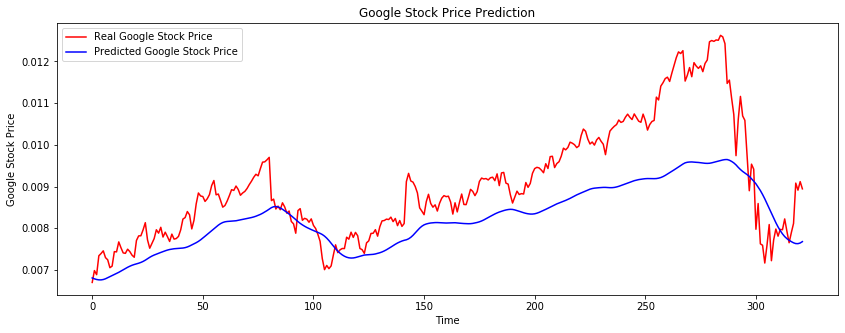

In [31]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test.round(),y_pred.round()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322

    accuracy                           1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.00      1.00      1.00       322

